In [134]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [135]:
data = pd.read_excel("Data AI4CKD.xlsx")
data.head()

,ID,Sexe,Age,Nationalité,Profession (selon catégorie professionnelle),Adresse (Département),Situation Matrimoniale,Motif(s) d'Admission/Asthénie,Motif(s) d'Admission/Altération de la fonction rénale,Motif(s) d'Admission/HTA,...,Pathologies/Rétinopathie diabétique,Pathologies/Artériosclérose,Pathologies/Glaucome,Autres Pathologies,Rythme Cardiaque/Sinusal,Rythme Cardiaque/Régulier,Trouble de la Repolarisation,Stage de l'IRC,Causes Majeure après Diagnostic/HTA,Causes Majeure après Diagnostic/Diabète
0,1,F,50.0,Béninoise,Artisan,Littoral,Marié(e),1.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
1,2,M,28.0,Béninoise,Artisan,Zou,Marié(e),1.0,1.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
2,3,F,69.0,Béninoise,NaN,Atlantique,Marié(e),1.0,1.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,NaN,CKD 5,0.0,0.0
3,4,M,68.0,Béninoise,Entrepreneur,Plateau,Marié(e),1.0,0.0,1.0,...,0.0,NaN,0.0,Flou visuel,0.0,NaN,Oui,CKD 5,0.0,0.0
4,5,F,68.0,Béninoise,NaN,NaN,Marié(e),1.0,1.0,0.0,...,0.0,NaN,1.0,NaN,0.0,Non,Non,CKD 5,1.0,0.0


In [136]:
df = data.copy()

In [137]:
cols_to_drop = [
    'Etat Général (EG)/Muqueuse Bulbaire','Etat Général (EG)/Muqueuse Palpébrale','OMI/Siégeant au niveau des pieds',"Evolution de l'Etat Générale/Favorable",'Personnels Médicaux/IRC', 'ID', 'Sexe', "Age", 'Nationalité', 'Profession (selon catégorie professionnelle)', "Autres Motifs d'Admission", 'IMC', 'Diurèse', 'Adresse (Département)', 'Glycémie à jeun (taux de Glucose)', 'Situation Matrimoniale', 'Personnels Chirurgicaux/Appendicectomie', 'Personnels Chirurgicaux/Césarienne', 'Personnels Chirurgicaux/Hystérectomie', 'Autre Antécédent Personnel Chirurgical', 'Personnels Médicaux/Ulcère', 'Autres Antécédents Personnels Médicaux', 'Durée HTA (mois)', 'Durée Diabète 1 (mois)', 'Durée Diabète 2 (mois)', 'Durée IRC (mois)', 'Autres Antécédents Personnels Familiaux', 'Personnels Familiaux/Diabète', 'Personnels Familiaux/HTA', 'Enquête Sociale/Tabac', 'Enquête Sociale/AlNS (+)', 'Enquête Sociale/Alcool', 'Enquête Sociale/Phytothérapie traditionnelle', 'Enquête Sociale/Epice', 'Enquête Sociale/PEC oui', 'Enquête Sociale/PEC non', "Autres détails de l'Enquête Sociale à Préciser", 'Début des symptômes (mois)', 'Symptômes/Fièvre', 'Symptômes/Fièvre', 'Symptômes/Frissons', 'Symptômes/Céphalées', 'Symptômes/Douleur Lombaire', 'Symptômes/Dysurie', 'Symptômes/Oligurie', 'Symptômes/Diarrhée', 'Symptômes/Douleur Thoracique', 'Symptômes/Anorexie', 'Symptômes/Douleur abdominale', 'Symptômes/Articulaire', 'Symptômes/Nycturie', 'Symptômes/Toux Grave', 'Symptômes/Détresse Respiratoire', 'Symptômes/Bouffissure du Visage', 'Autre Symptôme à Notifier', 'Automédication ?', 'Etat Général (EG)/Plis de déshydratation', 'Etat Général (EG)/Autre', 'Sueur', 'Température (C°)', 'TA (mmHg)/Systole', 'TA (mmHg)/Diastole', 'Poul (bpm)', 'Poids (Kg)', 'Taille (m)', 'SaO^2 (%)', 'FR (cpm)', 'BU/Leucocytose', 'BU/Nitrite', 'BU/Hématurie', 'BU/Protéinurie', 'BU/Glucosurie', 'BU/Albuminuerie', 'Coloration des Urines', 'Aspect des Urines', 'Vibrations Vocales (VV)', 'Amplification Thoracique', 'Sonorité Pulmonaire', 'Murmure Vésiculaire', 'Râles crépitants', "Autres Détails de l'Examen Pleuropulmonaire", 'B1 et B2/Réguliers', 'B1 et B2/Perçu sans souffle', 'Choc de Pointe/Perçu', 'Choc de Pointe/Palpé', 'Lieu de la Palpation/ EICG (Espace InterCostal Gauche)  ', 'Pouls Périphériques/Régulier', 'Présence de bruits surajoutés', 'TSJ (Signe de Hazer)', 'RHJ', 'Mollets souples', 'OMI/Bilatéral', 'OMI/Indolores', 'OMI/Mous', 'OMI/Douloureux', 'OMI/Prenant le godet', "OMI/Remontant jusqu'au", 'Hygiène buccodentaire', 'Langue', 'Abdomen/Souple', 'Abdomen/Balloné (et infiltré)', 'Abdomen/Douloureux', 'Douleur Epigastrique', 'Douleur Hypogastrique', "Douleur à l'hypochondre", 'Abdomen/Participe bien à la respiration', 'Matité des flancs', 'Hépatomégalie (augmentation du foi)', 'Points Urétéraux douloureux', 'Contact Lombaire', 'Fosse Lombaire/Symétrique', 'Fosse Lombaire/Douloureux', 'Présence de Masse Lombaire', 'Signe de Giordano', 'Miction (Incontinence Urinaire)/Vue', 'Miction (Incontinence Urinaire)/Confortable', 'Miction (Incontinence Urinaire)/Normale', 'Brûlures mictionnelles', 'Globe vésical', 'Douleur pelvienne', 'Vessie de Lutte', 'Ballotement Rénal', 'Conscience', 'Score de Glasgow (/15)', 'Motricité', 'Sensibilité', 'Convulsions', 'Protéinurie', 'Protéinurie à la bandellette urinaire (g/24h)', 'Na^+ (meq/L)', 'K^+ (meq/L)', 'Ca^2+ (meq/L)', 'Cl^- (meq/L)', 'P (meq/L)', 'Hb (g/dL)', 'Hte (%)', 'Hématie (T/L)', 'VGM (fL)', 'TCMH (pg)', 'CCMH (%)', 'NB (G/L)', 'PN (G/L)', 'PE (G/L)', 'PB (G/L)', 'Mo (G/L)', 'Ly (G/L)', 'Ret (g/L)', 'Plaquettes (g/L)', 'Cholestérol Total', 'Cholestérol HDL', 'Cholestérol LDL', 'Triglycérides', 'Tests Populaires/VIH', 'Tests Populaires/Ag HBs', 'Tests Populaires/Ac HVC', 'Tests Populaires/PU (g/24h)', 'Grosseur Rein Gauche ', 'Grosseur Rein Droit ', 'Calcul Rénal', 'Kyste', 'Différenciation des reins', 'Echogénicité', 'Contour régulier/Rein droit', 'Contour régulier/Rein gauche', 'Pathologies/Rétinopathie hypertensive', 'Pathologies/Rétinopathie diabétique', 'Pathologies/Artériosclérose', 'Pathologies/Glaucome', 'Autres Pathologies', 'Rythme Cardiaque/Sinusal', 'Rythme Cardiaque/Régulier', 'Trouble de la Repolarisation', 'Causes Majeure après Diagnostic/HTA', 'Causes Majeure après Diagnostic/Diabète', "Evolution de l'Etat Générale/Pas Favorable", "Etat Général (EG)/OMI", "Motif(s) d'Admission/Douleur abdominale", "Evolution de l'Etat Générale/Patient Perdu de vue"
]
df.drop(columns=cols_to_drop, inplace=True)

In [138]:
list(df.columns)

["Motif(s) d'Admission/Asthénie",
 "Motif(s) d'Admission/Altération de la fonction rénale",
 "Motif(s) d'Admission/HTA",
 "Motif(s) d'Admission/Œdème",
 "Motif(s) d'Admission/Diabète",
 'Personnels Médicaux/HTA',
 'Personnels Médicaux/Diabète 1',
 'Personnels Médicaux/Diabète 2',
 'Personnels Médicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)',
 'Personnels Médicaux/Pathologies virales (HB, HC, HIV)',
 'Symptômes/Anémie',
 'Symptômes/Nausées',
 'Symptômes/HTA',
 'Symptômes/Flou visuel',
 'Symptômes/Asthénie',
 'Symptômes/Vomissements',
 'Symptômes/Insomnie',
 'Symptômes/Perte de poids',
 'Symptômes/OMI',
 "Etat Général (EG) à l'Admission",
 'Urée (g/L)',
 'Créatinine (mg/L)',
 'Anémie',
 "Stage de l'IRC"]

In [139]:
dic1 = {
    "Oui":1,
    "Non":0
}
dic2 = {
    "Bon":1,
    "Aceptable":2,
    "Altéré":3
}
dic5 = {
    "CKD 1":1,
    "CKD 2":2,
    "CKD 3a":3,
    "CKD 3b":4,
    "CKD 4":5,
    "CKD 5":6
}

df["Anémie"] = df["Anémie"].map(dic1)
df["Symptômes/OMI"] = df["Symptômes/OMI"].map(dic1)
df["Stage de l'IRC"] = df["Stage de l'IRC"].map(dic5)
df["Etat Général (EG) à l'Admission"] = df["Etat Général (EG) à l'Admission"].map(dic2)

In [140]:
df.dropna(inplace=True)

In [141]:
X = df.drop("Stage de l'IRC", axis=1)
y = df["Stage de l'IRC"]
X = X.fillna(X.mode(numeric_only=True))

In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [144]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

In [145]:
y_pred = best_tree.predict(X_test)
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

         1.0       0.75      0.50      0.60         6
         2.0       0.43      0.43      0.43         7
         3.0       0.33      0.29      0.31         7
         4.0       0.80      0.67      0.73         6
         5.0       0.58      0.88      0.70         8
         6.0       0.89      0.89      0.89         9

    accuracy                           0.63        43
   macro avg       0.63      0.61      0.61        43
weighted avg       0.63      0.63      0.62        43



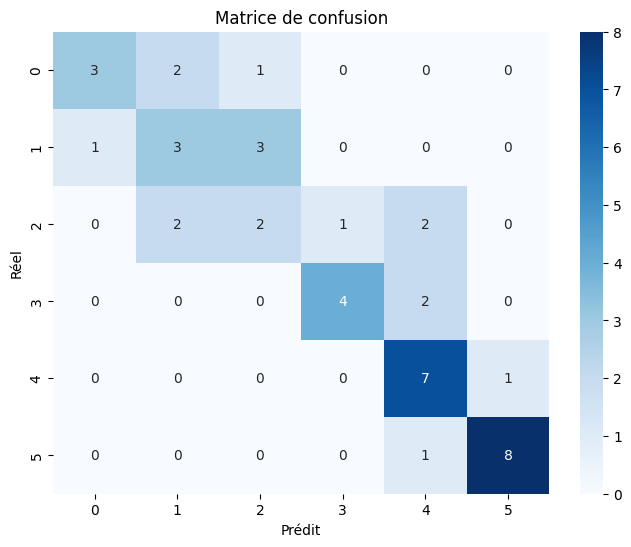

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

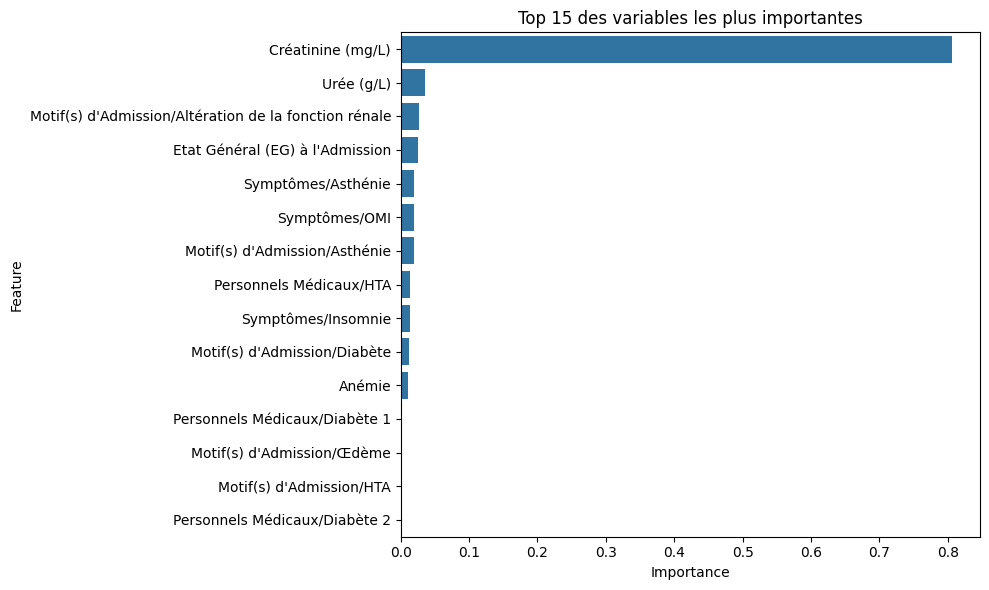

In [147]:
importances = best_tree.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 des variables les plus importantes")
plt.tight_layout()
plt.show()

In [148]:
explainer = shap.Explainer(best_tree, X_train, feature_names=features)
shap_values = explainer(X_test)

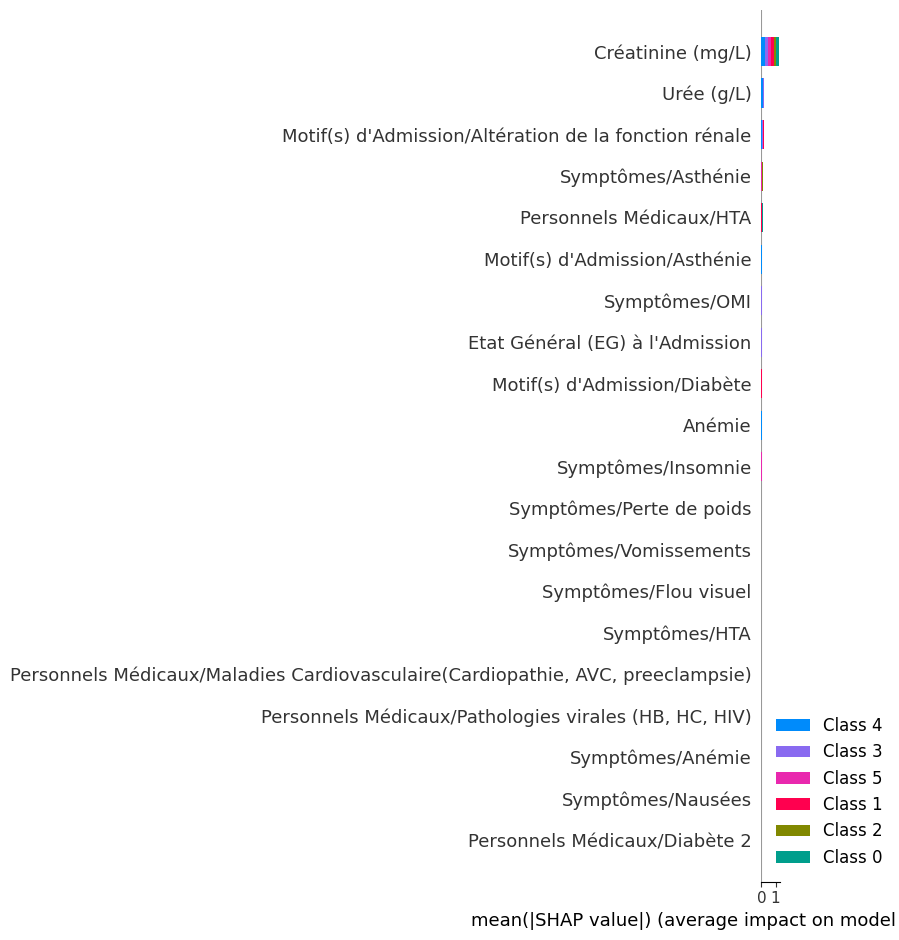

In [149]:
shap.summary_plot(shap_values, features=X_test, feature_names=features, plot_type="bar")